In [ ]:
import time
start_time = time.time()

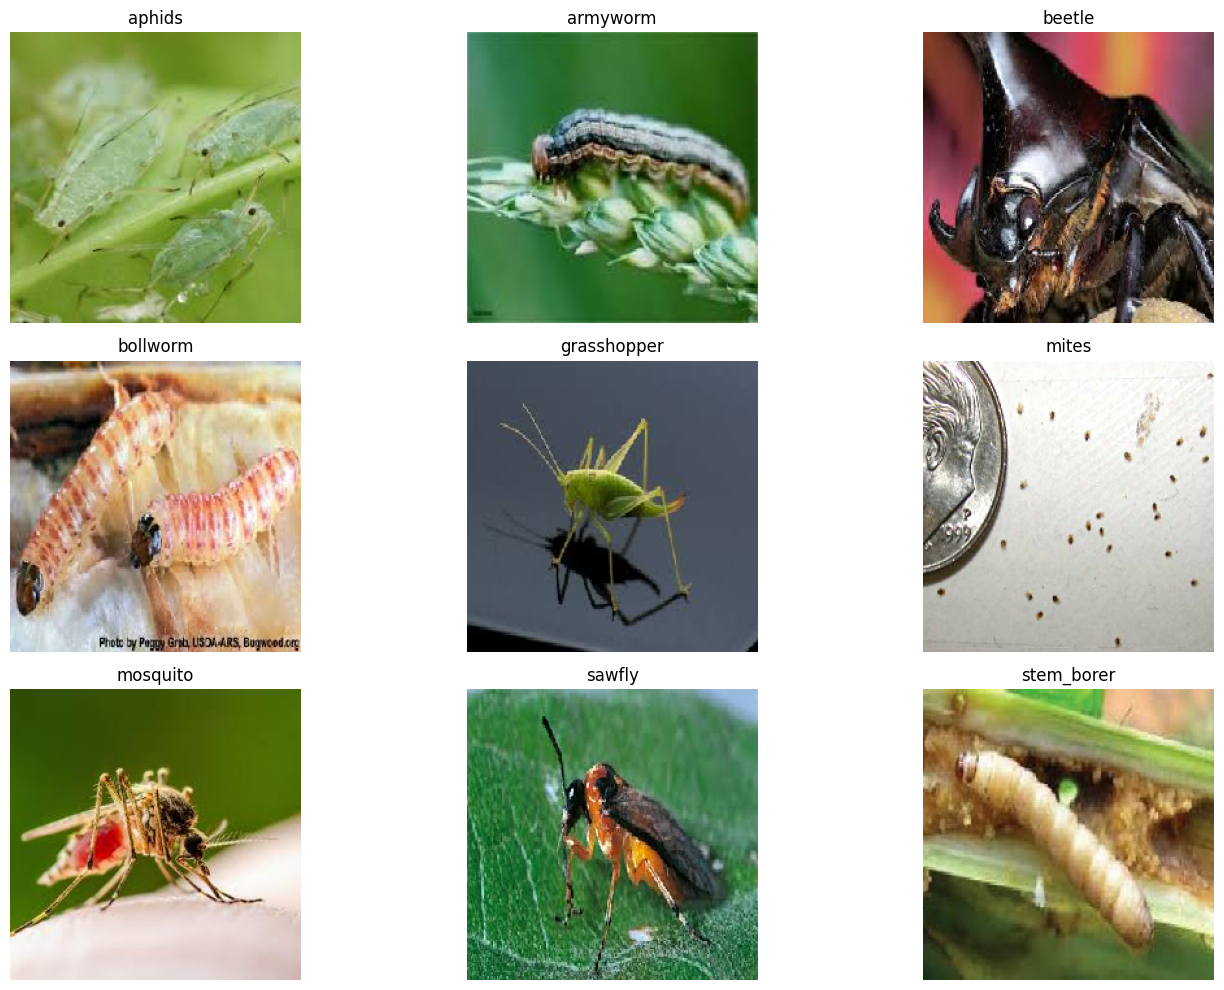

In [ ]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Path to your test dataset
test_dataset_path = '/content/drive/MyDrive/Projects/pest/test'

# Get the class labels
class_labels = sorted(os.listdir(test_dataset_path))

# Function to visualize one image from each class
def visualize_one_image_per_class(dataset_path, class_labels):
    plt.figure(figsize=(15, 10))
    for i, label in enumerate(class_labels):
        class_dir = os.path.join(dataset_path, label)
        img_name = os.listdir(class_dir)[0]  # Take the first image in each class
        img_path = os.path.join(class_dir, img_name)
        img = image.load_img(img_path, target_size=(224, 224))
        plt.subplot(3, 3, i+1)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize one image from each class
visualize_one_image_per_class(test_dataset_path, class_labels)


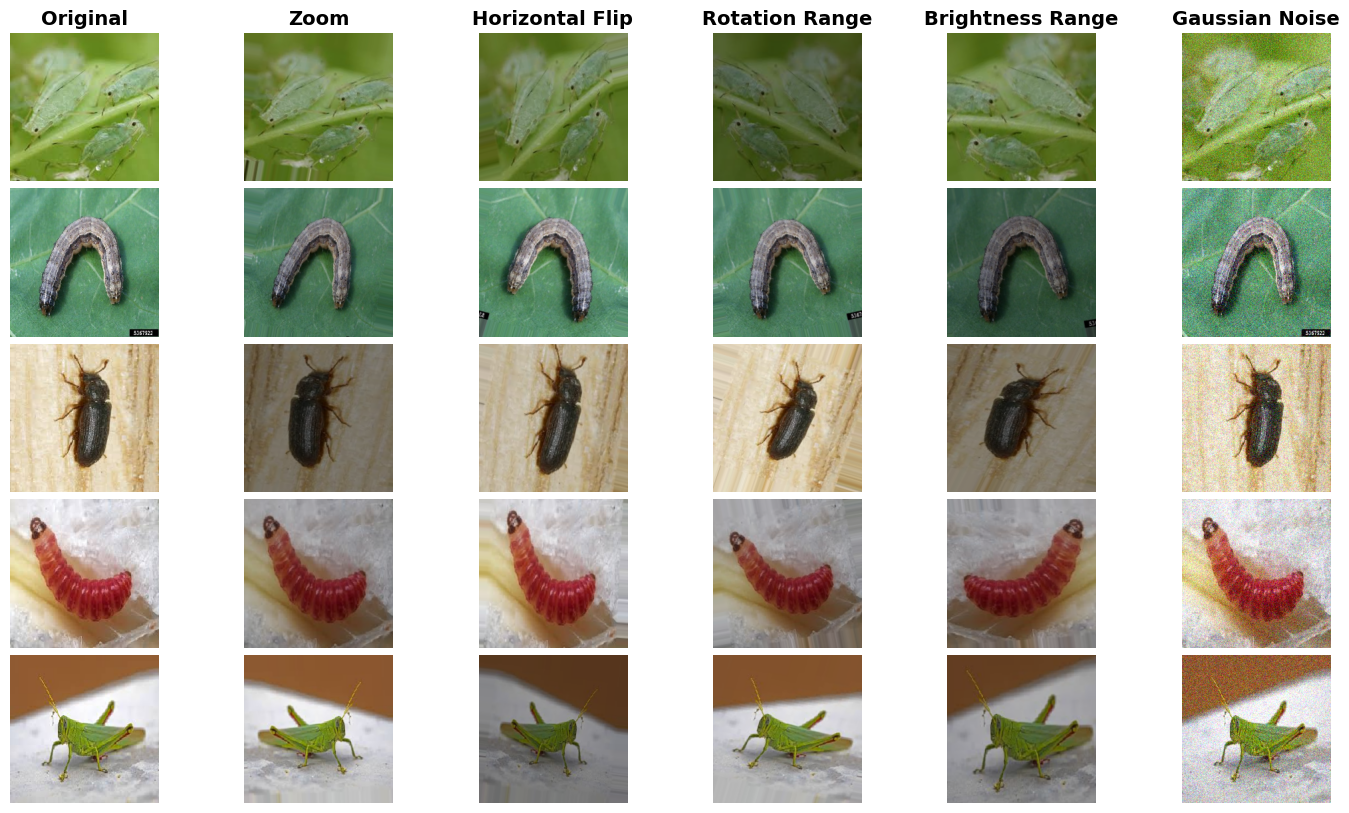

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from skimage.util import random_noise  # For Gaussian noise

# Path to the train dataset
train_dataset_path = '/content/drive/MyDrive/Projects/pest/train'

# Get the class labels
class_labels = sorted(os.listdir(train_dataset_path))

# Initialize ImageDataGenerator for augmentation (with Gaussian noise added later)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    brightness_range=[0.5, 1.0]
)

# Function to add Gaussian noise to an image
def add_gaussian_noise(image):
    noisy_image = random_noise(image, mode='gaussian', var=0.01)  # Adding Gaussian noise with low variance
    return np.clip(noisy_image, 0, 1)

# Function to visualize augmented images with specific augmentations
def visualize_augmented_images_with_gaussian(datagen, dataset_path, class_labels, total_images=1):
    fig, axes = plt.subplots(total_images, 6, figsize=(18, 10))

    # Only display the title headings once
    headings = ['Original', 'Zoom', 'Horizontal Flip', 'Rotation Range', 'Brightness Range', 'Gaussian Noise']
    for i, heading in enumerate(headings):
        axes[0, i].set_title(heading, fontsize=14, fontweight='bold')

    for idx, label in enumerate(class_labels[:total_images]):  # Visualize one image per class
        class_dir = os.path.join(dataset_path, label)
        img_name = os.listdir(class_dir)[0]  # Take the first image in each class
        img_path = os.path.join(class_dir, img_name)

        # Load the image
        img = load_img(img_path, target_size=(224, 224))
        img_array = img_to_array(img)  # Convert to NumPy array
        x = np.expand_dims(img_array, axis=0)

        # Generate augmentations
        aug_iter = datagen.flow(x, batch_size=1)
        zoom_img = aug_iter[0][0]  # Apply zoom
        flip_img = aug_iter[0][0]  # Apply horizontal flip
        rotation_img = aug_iter[0][0]  # Apply rotation
        brightness_img = aug_iter[0][0]  # Apply brightness adjustment

        # Apply Gaussian noise
        noisy_img = add_gaussian_noise(img_array / 255.0)

        # Display images in specified columns without repeating the headings
        for j, img_to_show in enumerate([img_array / 255.0, zoom_img, flip_img, rotation_img, brightness_img, noisy_img]):
            axes[idx, j].imshow(img_to_show)
            # Add 2px padding by setting the bounding box
            axes[idx, j].set_xticks([])
            axes[idx, j].set_yticks([])
            axes[idx, j].spines['top'].set_linewidth(2)
            axes[idx, j].spines['right'].set_linewidth(2)
            axes[idx, j].spines['bottom'].set_linewidth(2)
            axes[idx, j].spines['left'].set_linewidth(2)
            axes[idx, j].spines['top'].set_color('white')
            axes[idx, j].spines['right'].set_color('white')
            axes[idx, j].spines['bottom'].set_color('white')
            axes[idx, j].spines['left'].set_color('white')

        # Turn off axes for all images
        for ax in axes[idx, :]:
            ax.axis('off')

    # Reduce space between images and add padding
    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    plt.show()

# Visualize augmented images with Gaussian noise and specified columns
visualize_augmented_images_with_gaussian(train_datagen, train_dataset_path, class_labels, total_images=5)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define input size for VGG16
input_shape = (224, 224, 3)  # VGG16 expects input images of this size

# Load the pre-trained VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for classification
x = base_model.output
x = Flatten()(x)  # Flatten the output of the conv layers
x = Dense(256, activation='relu')(x)  # Fully connected layer
x = Dropout(0.5)(x)  # Add dropout to avoid overfitting
predictions = Dense(len(class_labels), activation='softmax')(x)  # Output layer for classification

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print summary of the model
model.summary()



58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,139,785 (80.64 MB)

 Trainable params: 6,425,097 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Paths to the train and test datasets
train_dataset_path = '/content/drive/MyDrive/Projects/pest/train'
test_dataset_path = '/content/drive/MyDrive/Projects/pest/test'

# Initialize ImageDataGenerator for train and test data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    brightness_range=[0.5, 1.0]
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Specify batch size and image size
batch_size = 16
img_size = (224, 224)

# Create train and test generators
train_generator = train_datagen.flow_from_directory(
    train_dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important to set shuffle=False for correct labels in confusion matrix
)

# Learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)




Found 2700 images belonging to 9 classes.
Found 450 images belonging to 9 classes.


In [7]:
# Train the model
history = model.fit(
    train_generator,
    epochs=50,  # Adjust as needed
    validation_data=test_generator,
    callbacks=[reduce_lr]  # Apply learning rate reduction on plateau
)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


169/169 ━━━━━━━━━━━━━━━━━━━━ 1866s 11s/step - accuracy: 0.2816 - loss: 2.0370 - val_accuracy: 0.7467 - val_loss: 1.0150 - learning_rate: 1.0000e-04
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 74s 321ms/step - accuracy: 0.5518 - loss: 1.3423 - val_accuracy: 0.8444 - val_loss: 0.6365 - learning_rate: 1.0000e-04
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 82s 319ms/step - accuracy: 0.6781 - loss: 1.0007 - val_accuracy: 0.9022 - val_loss: 0.4385 - learning_rate: 1.0000e-04
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 83s 323ms/step - accuracy: 0.7580 - loss: 0.8006 - val_accuracy: 0.9356 - val_loss: 0.3272 - learning_rate: 1.0000e-04
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 81s 318ms/step - accuracy: 0.7853 - loss: 0.7020 - val_accuracy: 0.9689 - val_loss: 0.2240 - learning_rate: 1.0000e-04
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 82s 312ms/step - accuracy: 0.8293 - loss: 0.5747 - val_accuracy: 0.9911 - val_loss: 0.1641 - learning_rate: 1.0000e-04
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 82s 312ms/step - 

In [10]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(test_generator)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')




29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - accuracy: 0.9994 - loss: 0.0033
Test loss: 0.0057
Test accuracy: 0.9978


In [9]:
end_time = time.time()

# Calculate and print execution time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Execution time: 5386.835337162018 seconds


29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step


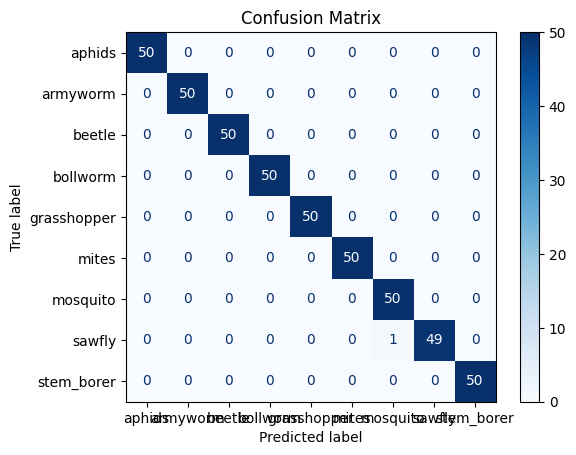

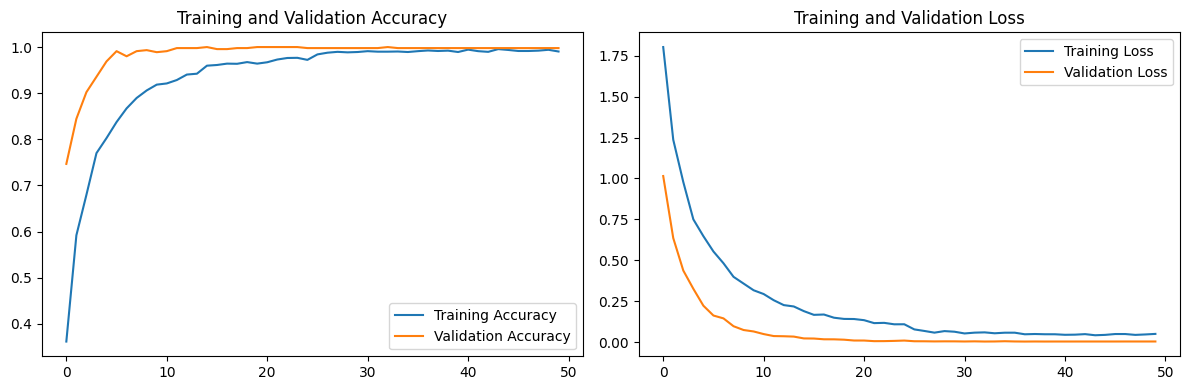

In [11]:
# Predict the labels on the test set
test_generator.reset()
preds = model.predict(test_generator, verbose=1)
predicted_labels = np.argmax(preds, axis=1)
true_labels = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Visualize training history
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.tight_layout()
    plt.show()

# Plot training history
plot_training_history(history)

In [12]:
# Save the model
model.save('/content/drive/MyDrive/vgg16_pest_model.h5')